### 3.Preprocessing the data


#### First find the data points that has NA values

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error
from luciferml.supervised.classification import Classification
from luciferml.preprocessing import Preprocess as prep
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\ASUS Zephyrus G15\DATA1030-Fall2021\data 1030 project\data\전국상수도수질검사표준데이터.xls')

In [20]:
df.to_parquet(r'C:\Users\ASUS Zephyrus G15\DATA1030-Fall2021\data 1030 project\data\before_split.parquet')

In [21]:
df.isnull().sum()

Potability                           0
general_bacteria                     0
lead                                 0
fluoride                             0
arsenic                              0
selenium                             0
ammonia-like_nitrogen                0
nitrogen_nitrate                     0
cadmium                              0
phenol                               0
diazinone                            0
carbaryl                             0
1_1_1-trichloroethane                0
tetrachloroethylene                  0
trichloroethylene                    0
carbon_tetrachloride                 0
1_1-dichloroethylene                 0
dichloromethane                      0
toluene                              0
Xylene                               0
1_2-dibromo-3-chloropropane          0
1_4-dioxane.                         0
residual_goat                        0
total_trihalomethane                 0
chloroform                           0
bromodichloromethane     

In [3]:
y = df['Potability']
X = df.loc[:, df.columns != 'Potability']

In [21]:
std_ftrs = ['general_bacteria','lead','fluoride','arsenic','selenium','ammonia-like_nitrogen',
           'nitrogen_nitrate','cadmium','phenol','diazinone','carbaryl','1_1_1-trichloroethane','tetrachloroethylene','trichloroethylene',
           'carbon_tetrachloride','1_1-dichloroethylene','dichloromethane','toluene','Xylene','1_2-dibromo-3-chloropropane','1_4-dioxane.','residual_goat',
           'total_trihalomethane','chloroform','bromodichloromethane','chloral_hydrate','dibromoacetonitrile','dichloroacetonitrile','trichloroacetonitrile',
           'haloacetic_seed','formaldehyde','Bronze','chromaticity','detergent','pH','zinc','chloride_ion','Fe','Mn',
           'turbidity','sulfate_ion','potasium_permanganate_consumption','aluminum']

X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=47)
kf = KFold(n_splits=5,shuffle=True,random_state=47)

preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_other_prep = clf.fit_transform(X_other)
X_test_prep = clf.transform(X_test)

In [23]:
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 

   training set: (1302, 43) (1302,)
   validation set: (326, 43) (326,)
   training set: (1302, 43) (1302,)
   validation set: (326, 43) (326,)
   training set: (1302, 43) (1302,)
   validation set: (326, 43) (326,)
   training set: (1303, 43) (1303,)
   validation set: (325, 43) (325,)
   training set: (1303, 43) (1303,)
   validation set: (325, 43) (325,)


In [25]:
import xlwt
df_train = pd.DataFrame(data=X_other_prep)
df_val = pd.DataFrame(data=X_test_prep)

df_train.to_excel(r'C:\Users\ASUS Zephyrus G15\DATA1030-Fall2021\data 1030 project\data\prep_train.xls')
df_val.to_excel(r'C:\Users\ASUS Zephyrus G15\DATA1030-Fall2021\data 1030 project\data/prep_val.xls')


C:\Users\ASUSZE~1\AppData\Local\Temp/ipykernel_44848/1756234085.py:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_train.to_excel(r'C:\Users\ASUS Zephyrus G15\DATA1030-Fall2021\data 1030 project\data\prep_train.xls')
C:\Users\ASUSZE~1\AppData\Local\Temp/ipykernel_44848/1756234085.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silen

In [26]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Classifier', SVC()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('XGB Classifier', XGBClassifier(verbosity = 0,use_label_encoder=False)),
]

results = dict()
for name, model in models:
    model.fit(X_other, y_other)
    pred = model.predict(X_test)
    
    
    score = accuracy_score(y_test, pred)    
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    precision = precision_score(y_test, pred) 
    results[name] = score  

In [27]:
df_results = pd.DataFrame([results])
df_results = df_results.transpose()
df_results = df_results.rename(columns={0:'Score'}).sort_values(by='Score',ascending=False)

In [28]:
df_results

,Score
XGB Classifier,0.889706
Random Forest Classifier,0.884804
Logistic Regression,0.713235
Support Vector Classifier,0.600490


### baseline accuracy can be computed as the portion of the largest class

In [20]:
print(df.Potability.value_counts(),'\n')

print("Baseline accuracy for our prediction: ", df.Potability.value_counts()[0]/len(df))

1    1226
0     810
Name: Potability, dtype: int64 

Baseline accuracy for our prediction:  0.39783889980353637


In [29]:
classifier = Classification(
    predictor='all', 
    params= {},
    cv_folds=5, 
    epochs=10,     
    exclude_models=[
        "sgd",
        "perc",
        "ann",
    ]
)
classifier.fit(X, y)


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝

Started LuciferML 

Checking if labels or features are categorical! [*]

Features are not categorical [ ✓ ]

Labels are not categorical [ ✓ ]

Checking for Categorical Variables Done [ ✓ ]

Checking for Sparse Matrix [*]

Checking for Sparse Matrix Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training All Classifiers [*]



C:\Anaconda\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda\envs\data1030\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

Training All Classifiers Done [ ✓ ]

Saved Best Model to lucifer_ml_info/best/classifier/models/XGBoost_Classifier_1638686406.pkl and its scaler to lucifer_ml_info/best/classifier/scalers/XGBoost_Classifier_Scaler_1638686406.pkl 



,Name,Accuracy,KFold Accuracy
0,Logistic Regression,75.000000,74.445682
1,Passive Aggressive Classifier,62.745098,63.697216
2,Ridge Classifier,72.549020,74.077584
3,Support Vector Machine,79.166667,79.235488
4,K-Nearest Neighbours,80.882353,81.508825
5,Decision Trees,79.411765,76.964228
6,Naive Bayes,49.754902,48.097216
7,Random Forest Classifier,86.764706,88.081925
8,Gradient Boosting Classifier,82.843137,83.290042
9,AdaBoost Classifier,75.735294,78.747145


Complete [ ✓ ]

Time Elapsed :  17.80840253829956 seconds 



In [13]:
blues = ['#193f6e','#3b6ba5','#72a5d3','#b1d3e3','#e1ebec']
darks = ['#4e5560','#866a67','#9a9385','#c5bfa7','#e6dbc8']
cmap_blues = sns.color_palette(blues)
cmap_darks = sns.color_palette(darks)
sns.set_palette(cmap_blues)

In [14]:
# test different base models
models = [
    ('LogReg', LogisticRegression(max_iter=1000)),
    ('SVC', SVC()),
    ('RFC', RandomForestClassifier()),
    ('XGB', XGBClassifier(verbosity = 0,use_label_encoder=False)),
]

results = dict()

for name, model in models:
    model.fit(X_other, y_other)
    y_hat = model.predict(X_test)
    score = precision_score(y_test, y_hat, average='macro')
    results[name] = score

In [15]:
df_results = pd.DataFrame([results])
df_results = df_results.transpose()
df_results = df_results.rename(columns={0:'Precision'}).sort_values(by='Precision',ascending=False)

NameError: name 'lines' is not defined

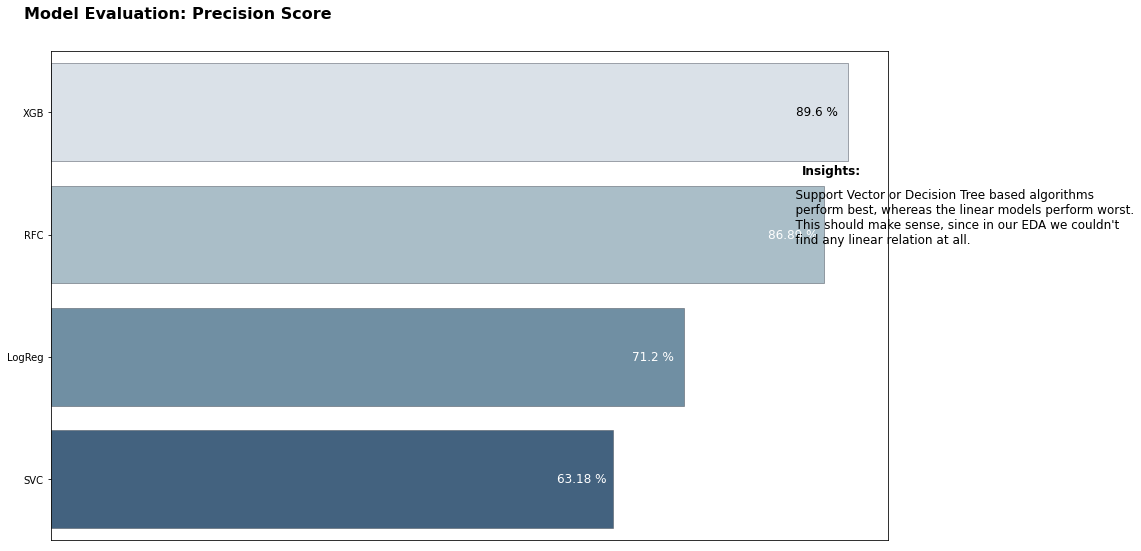

In [16]:
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=df_results, y=df_results.index, x='Precision', orient='h', palette='Blues', saturation=0.4, edgecolor=darks[0], linewidth=0.5)

ax.set_xlabel('')
ax.set_xticks([])

# Bar Annotation
for idx in range(0,len(df_results.index)):
    color='black' 
    if idx > (len(df_results.index)-4): color='white'
        
    ax.annotate(
        f"{np.round(df_results['Precision'][idx]*100,2)} %",
        xy=(df_results['Precision'][idx]-0.035, idx),
        va='center', ha='center', fontsize=12, color=color
    )

# Title & Annotation
fig.text(0.1,0.93,'Model Evaluation: Precision Score',fontsize=16, fontweight='bold')
fig.text(0.82,0.69,'Insights:', fontsize=12, fontweight='bold')
fig.text(0.8,0.56,'''
    Support Vector or Decision Tree based algorithms 
    perform best, whereas the linear models perform worst.
    This should make sense, since in our EDA we couldn't
    find any linear relation at all.
''', fontsize=12, fontweight='light')

# seperation lines    
l1 = lines.Line2D([0.8, 0.8], [0.5, 0.7], transform=fig.transFigure, figure=fig,color='#ccc',lw=1)
fig.lines.extend([l1])

# Despine
for spine in ['top','left','right','bottom']:
    ax.spines[spine].set_visible(False)